In [ ]:
import cv2
cv2.__version__

'4.10.0'

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
!git clone https://github.com/dltpdn/insightbook.opencv_project_python

Cloning into 'insightbook.opencv_project_python'...
remote: Enumerating objects: 469, done.
remote: Counting objects: 100% (80/80), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 469 (delta 23), reused 38 (delta 16), pack-reused 389 (from 1)
Receiving objects: 100% (469/469), 30.72 MiB | 11.70 MiB/s, done.
Resolving deltas: 100% (39/39), done.
Updating files: 100% (370/370), done.


#5장 기하학적 변환

In [ ]:
%cd /content/insightbook.opencv_project_python/05.geometric_transform

/content/insightbook.opencv_project_python/05.geometric_transform


##5.1 이동, 확대/축소, 회전

### 5.1.1 이동

In [ ]:
!python translate.py

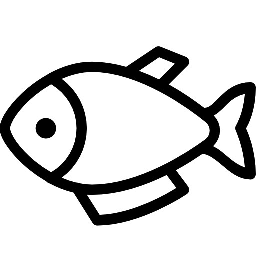

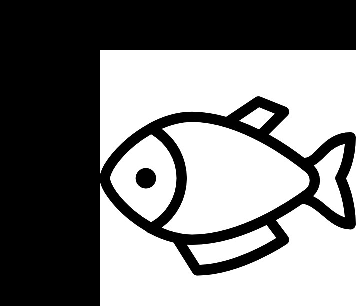

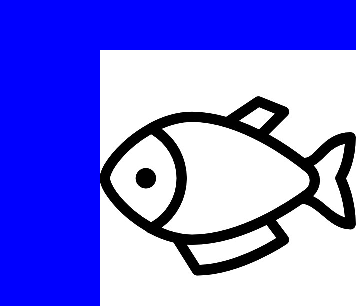

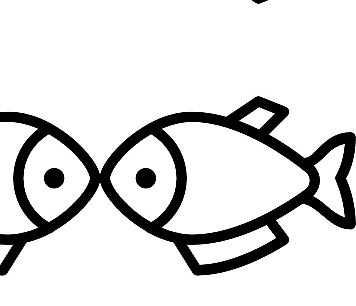

In [ ]:
import cv2
import numpy as np

img = cv2.imread('../img/fish.jpg')
rows,cols = img.shape[0:2]  # 영상의 크기

dx, dy = 100, 50            # 이동할 픽셀 거리

# ---① 변환 행렬 생성
mtrx = np.float32([[1, 0, dx],
                   [0, 1, dy]])
# ---② 단순 이동
dst = cv2.warpAffine(img, mtrx, (cols+dx, rows+dy))

# ---③ 탈락된 외곽 픽셀을 파랑색으로 보정
dst2 = cv2.warpAffine(img, mtrx, (cols+dx, rows+dy), None, \
                        cv2.INTER_LINEAR, cv2.BORDER_CONSTANT, (255,0,0) )

# ---④ 탈락된 외곽 픽셀을 원본을 반사 시켜서 보정
dst3 = cv2.warpAffine(img, mtrx, (cols+dx, rows+dy), None, \
                                cv2.INTER_LINEAR, cv2.BORDER_REFLECT)

#cv2.imshow('original', img)
#cv2.imshow('trans',dst)
#cv2.imshow('BORDER_CONSTATNT', dst2)
#cv2.imshow('BORDER_FEFLECT', dst3)

cv2_imshow(img)
cv2_imshow(dst)
cv2_imshow(dst2)
cv2_imshow(dst3)

cv2.waitKey(0)
cv2.destroyAllWindows()

### 5.1.2 확대/축소

In [ ]:
!python scale_matrix.py

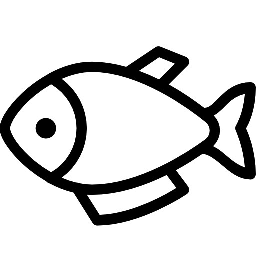

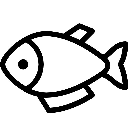

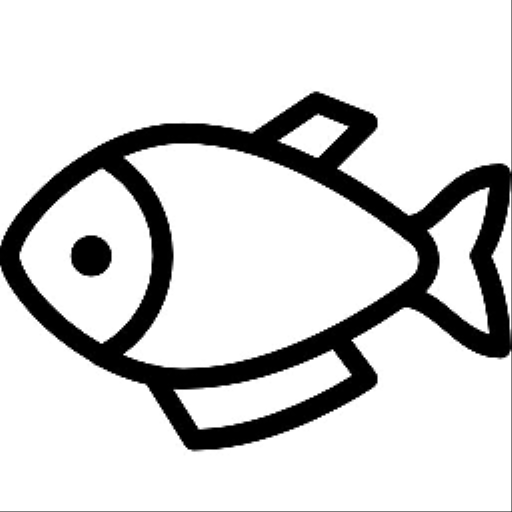

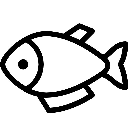

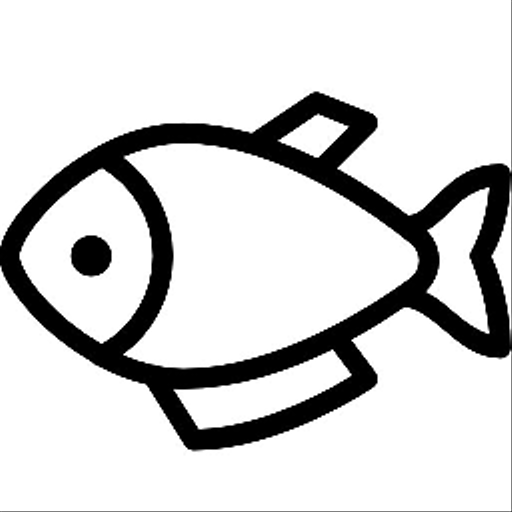

In [ ]:
import cv2
import numpy as np

img = cv2.imread('../img/fish.jpg')
height, width = img.shape[:2]

# --① 0.5배 축소 변환 행렬
m_small = np.float32([[0.5, 0, 0],
                       [0, 0.5,0]])
# --② 2배 확대 변환 행렬
m_big = np.float32([[2, 0, 0],
                     [0, 2, 0]])

# --③ 보간법 적용 없이 확대 축소
dst1 = cv2.warpAffine(img, m_small, (int(height*0.5), int(width*0.5)))
dst2 = cv2.warpAffine(img, m_big, (int(height*2), int(width*2)))

# --④ 보간법 적용한 확대 축소
dst3 = cv2.warpAffine(img, m_small, (int(height*0.5), int(width*0.5)), \
                        None, cv2.INTER_AREA)
dst4 = cv2.warpAffine(img, m_big, (int(height*2), int(width*2)), \
                        None, cv2.INTER_CUBIC)

# 결과 출력
#cv2.imshow("original", img)
#cv2.imshow("small", dst1)
#cv2.imshow("big", dst2)
#cv2.imshow("small INTER_AREA", dst3)
#cv2.imshow("big INTER_CUBIC", dst4)

cv2_imshow(img)
cv2_imshow(dst1)
cv2_imshow(dst2)
cv2_imshow(dst3)
cv2_imshow(dst4)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
!python scale_resize.py

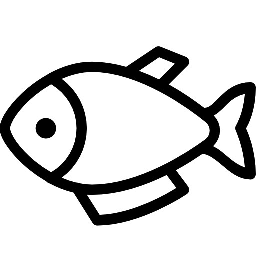

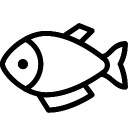

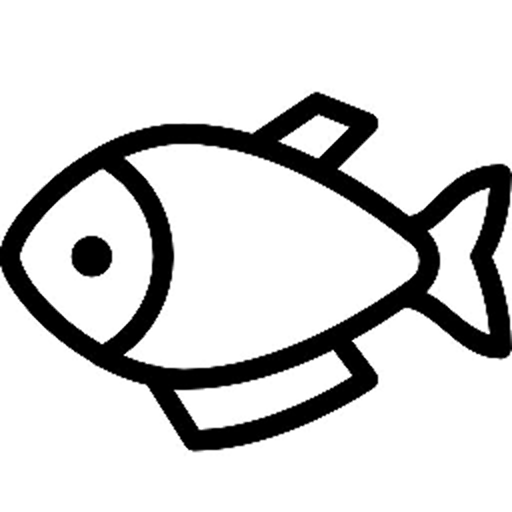

In [ ]:
import cv2
import numpy as np

img = cv2.imread('../img/fish.jpg')
height, width = img.shape[:2]

#--① 크기 지정으로 축소
#dst1 = cv2.resize(img, (int(width*0.5), int(height*0.5)),\
#                        None, 0, 0, cv2.INTER_AREA)
dst1 = cv2.resize(img, (int(width*0.5), int(height*0.5)), \
                         interpolation=cv2.INTER_AREA)

#--② 배율 지정으로 확대
dst2 = cv2.resize(img, None,  None, 2, 2, cv2.INTER_CUBIC)
#--③ 결과 출력
#cv2.imshow("original", img)
#cv2.imshow("small", dst1)
#cv2.imshow("big", dst2)

cv2_imshow(img)
cv2_imshow(dst1)
cv2_imshow(dst2)

cv2.waitKey(0)
cv2.destroyAllWindows()

### 5.1.3 회전

In [ ]:
!python rotate_matrix.py

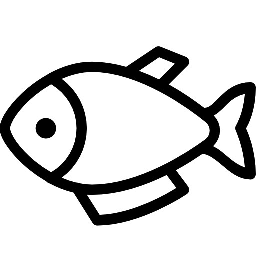

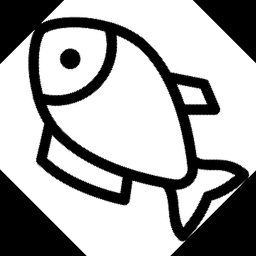

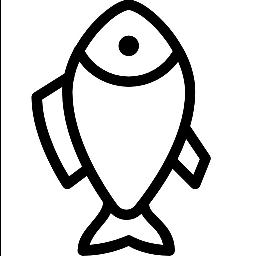

In [ ]:
import cv2
import numpy as np

img = cv2.imread('../img/fish.jpg')
rows,cols = img.shape[0:2]

# ---① 라디안 각도 계산(60진법을 호도법으로 변경)
d45 = 45.0 * np.pi / 180    # 45도
d90 = 90.0 * np.pi / 180    # 90도

# ---② 회전을 위한 변환 행렬 생성
m45 = np.float32( [[ np.cos(d45), -1* np.sin(d45), rows//2],
                    [np.sin(d45), np.cos(d45), -1*cols//4]])
m90 = np.float32( [[ np.cos(d90), -1* np.sin(d90), rows],
                    [np.sin(d90), np.cos(d90), 0]])

# ---③ 회전 변환 행렬 적용
r45 = cv2.warpAffine(img,m45,(cols,rows))
r90 = cv2.warpAffine(img,m90,(rows,cols))

# ---④ 결과 출력
#cv2.imshow("origin", img)
#cv2.imshow("45", r45)
#cv2.imshow("90", r90)

cv2_imshow(img)
cv2_imshow(r45)
cv2_imshow(r90)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
!python rotate_getmatrix.py

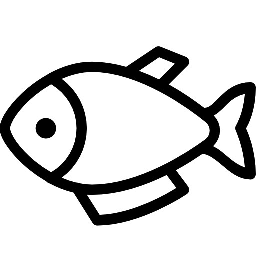

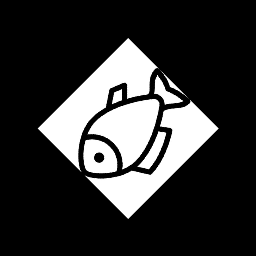

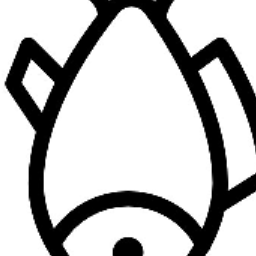

In [ ]:
import cv2

img = cv2.imread('../img/fish.jpg')
rows,cols = img.shape[0:2]

#---① 회전을 위한 변환 행렬 구하기
# 회전축:중앙, 각도:45, 배율:0.5
m45 = cv2.getRotationMatrix2D((cols/2,rows/2),45,0.5)
# 회전축:중앙, 각도:90, 배율:1.5
m90 = cv2.getRotationMatrix2D((cols/2,rows/2),90,1.5)

#---② 변환 행렬 적용
img45 = cv2.warpAffine(img, m45,(cols, rows))
img90 = cv2.warpAffine(img, m90,(cols, rows))

#---③ 결과 출력
#cv2.imshow('origin',img)
#cv2.imshow("45", img45)
#cv2.imshow("90", img90)

cv2_imshow(img)
cv2_imshow(img45)
cv2_imshow(img90)

cv2.waitKey(0)
cv2.destroyAllWindows()

##5.2 뒤틀기

### 5.2.1 어핀 변환

In [ ]:
!python getAffine.py

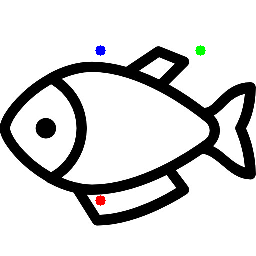

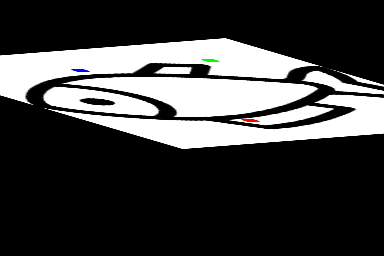

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

file_name = '../img/fish.jpg'
img = cv2.imread(file_name)
rows, cols = img.shape[:2]

# ---① 변환 전, 후 각 3개의 좌표 생성
pts1 = np.float32([[100, 50], [200, 50], [100, 200]])
pts2 = np.float32([[80, 70], [210, 60], [250, 120]])

# ---② 변환 전 좌표를 이미지에 표시
cv2.circle(img, (100,50), 5, (255,0), -1)
cv2.circle(img, (200,50), 5, (0,255,0), -1)
cv2.circle(img, (100,200), 5, (0,0,255), -1)

#---③ 짝지은 3개의 좌표로 변환 행렬 계산
mtrx = cv2.getAffineTransform(pts1, pts2)
#---④ 어핀 변환 적용
dst = cv2.warpAffine(img, mtrx, (int(cols*1.5), rows))

#---⑤ 결과 출력
#cv2.imshow('origin',img)
#cv2.imshow('affin', dst)

cv2_imshow(img)
cv2_imshow(dst)

cv2.waitKey(0)
cv2.destroyAllWindows()

### 5.2.2 원근 변환

In [ ]:
!python perspective.py

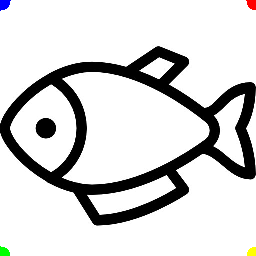

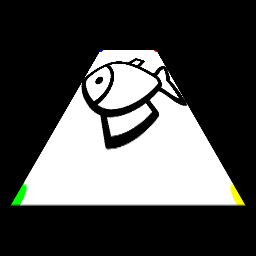

In [ ]:
import cv2
import numpy as np

file_name = "../img/fish.jpg"
img = cv2.imread(file_name)
rows, cols = img.shape[:2]

#---① 원근 변환 전 후 4개 좌표
pts1 = np.float32([[0,0], [0,rows], [cols, 0], [cols,rows]])
pts2 = np.float32([[100,50], [10,rows-50], [cols-100, 50], [cols-10,rows-50]])

#---② 변환 전 좌표를 원본 이미지에 표시
cv2.circle(img, (0,0), 10, (255,0,0), -1)
cv2.circle(img, (0,rows), 10, (0,255,0), -1)
cv2.circle(img, (cols,0), 10, (0,0,255), -1)
cv2.circle(img, (cols,rows), 10, (0,255,255), -1)

#---③ 원근 변환 행렬 계산
mtrx = cv2.getPerspectiveTransform(pts1, pts2)
#---④ 원근 변환 적용
dst = cv2.warpPerspective(img, mtrx, (cols, rows))

#cv2.imshow("origin", img)
#cv2.imshow('perspective', dst)

cv2_imshow(img)
cv2_imshow(dst)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
!python perspective_scan.py

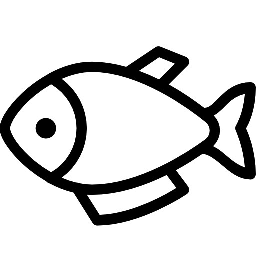

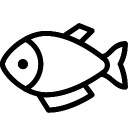

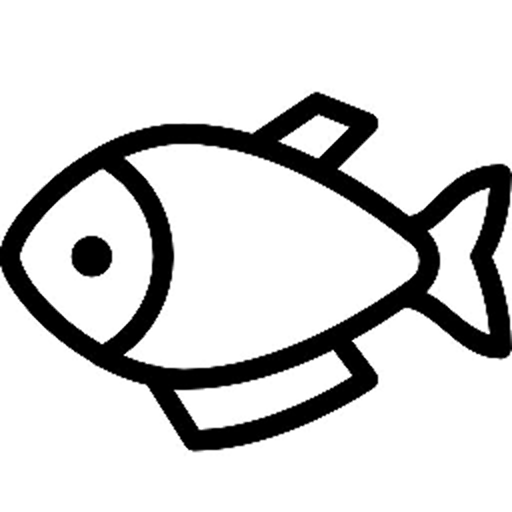

In [ ]:
import cv2
import numpy as np

img = cv2.imread('../img/fish.jpg')
height, width = img.shape[:2]

#--① 크기 지정으로 축소
#dst1 = cv2.resize(img, (int(width*0.5), int(height*0.5)),\
#                        None, 0, 0, cv2.INTER_AREA)
dst1 = cv2.resize(img, (int(width*0.5), int(height*0.5)), \
                         interpolation=cv2.INTER_AREA)

#--② 배율 지정으로 확대
dst2 = cv2.resize(img, None,  None, 2, 2, cv2.INTER_CUBIC)
#--③ 결과 출력
#cv2.imshow("original", img)
#cv2.imshow("small", dst1)
#cv2.imshow("big", dst2)

cv2_imshow(img)
cv2_imshow(dst1)
cv2_imshow(dst2)

cv2.waitKey(0)
cv2.destroyAllWindows()

### 5.2.3 삼각형 어핀 변환

In [ ]:
!python triangle_affine.py

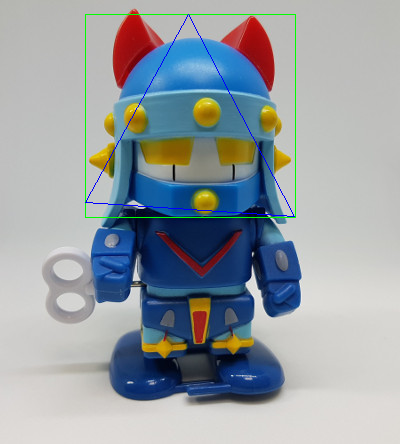

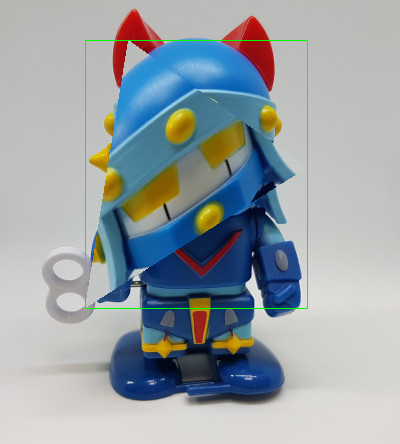

In [ ]:
import cv2
import numpy as np

img = cv2.imread("../img/taekwonv1.jpg")
img2 = img.copy()
draw = img.copy()

# 변환 전,후 삼각형 좌표 ---①
pts1 = np.float32([[188,14], [85,202], [294,216]])
pts2 = np.float32([[128,40], [85,307], [306,167]])

# 각 삼각형을 완전히 감싸는 사각형 좌표 구하기 ---②
x1,y1,w1,h1 = cv2.boundingRect(pts1)
x2,y2,w2,h2 = cv2.boundingRect(pts2)

# 사각형을 이용한 관심영역 설정 ---③
roi1 = img[y1:y1+h1, x1:x1+w1]
roi2 = img2[y2:y2+h2, x2:x2+w2]

# 관심영역을 기준으로 좌표 계산 ---④
offset1 = np.zeros((3,2), dtype=np.float32)
offset2 = np.zeros((3,2), dtype=np.float32)
for i in range(3):
    offset1[i][0], offset1[i][1] = pts1[i][0]-x1, pts1[i][1]-y1
    offset2[i][0], offset2[i][1] = pts2[i][0]-x2, pts2[i][1]-y2

# 관심 영역을 주어진 삼각형 좌표로 어핀 변환 ---⑤
mtrx = cv2.getAffineTransform(offset1, offset2)
warped = cv2.warpAffine( roi1, mtrx, (w2, h2), None, \
                        cv2.INTER_LINEAR, cv2.BORDER_REFLECT_101)

# 어핀 변환 후 삼각형만 골라 내기 위한 마스크 생성 ---⑥
mask = np.zeros((h2, w2), dtype = np.uint8)
cv2.fillConvexPoly(mask, np.int32(offset2), (255))

# 삼각형 영역만 마스킹해서 합성 ---⑦
warped_masked = cv2.bitwise_and(warped, warped, mask=mask)
roi2_masked = cv2.bitwise_and(roi2, roi2, mask=cv2.bitwise_not(mask))
roi2_masked = roi2_masked + warped_masked
img2[y2:y2+h2, x2:x2+w2] = roi2_masked

# 관심 영역과 삼각형에 선 그려서 출력 ---⑧
cv2.rectangle(draw, (x1, y1), (x1+w1, y1+h1), (0,255,0), 1)
cv2.polylines(draw, [pts1.astype(np.int32)], True, (255,0,0), 1)
cv2.rectangle(img2, (x2, y2), (x2+w2, y2+h2), (0,255,0), 1)
#cv2.imshow('origin', draw)
#cv2.imshow('warped triangle', img2)

cv2_imshow(draw)
cv2_imshow(img2)

cv2.waitKey(0)
cv2.destroyAllWindows()

##5.3 렌즈 왜곡

### 5.3.1 리매핑

In [ ]:
!python remap_flip.py

matrix: 0.0026748180389404297
remap: 0.005590200424194336


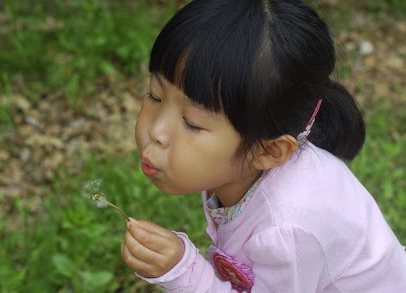

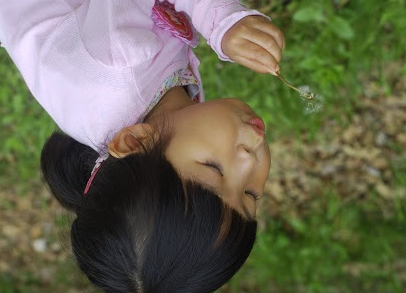

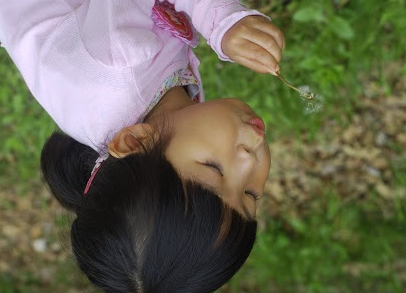

In [ ]:
import cv2
import numpy as np
import time

img = cv2.imread('../img/girl.jpg')
rows, cols = img.shape[:2]

# 뒤집기 변환 행렬로 구현 ---①
st = time.time()
mflip = np.float32([ [-1, 0, cols-1],[0, -1, rows-1]]) # 변환 행렬 생성
fliped1 = cv2.warpAffine(img, mflip, (cols, rows))     # 변환 적용
print('matrix:', time.time()-st)

# remap 함수로 뒤집기 구현 ---②
st2 = time.time()
mapy, mapx = np.indices((rows, cols),dtype=np.float32) # 매핑 배열 초기화 생성
mapx = cols - mapx -1                                  # x축 좌표 뒤집기 연산
mapy = rows - mapy -1                                  # y축 좌표 뒤집기 연산
fliped2 = cv2.remap(img,mapx,mapy,cv2.INTER_LINEAR)  # remap 적용
print('remap:', time.time()-st2)

# 결과 출력 ---③
#cv2.imshow('origin', img)
#cv2.imshow('fliped1',fliped1)
#cv2.imshow('fliped2',fliped2)

cv2_imshow(img)
cv2_imshow(fliped1)
cv2_imshow(fliped2)

cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
!python remap_sin_cos.py

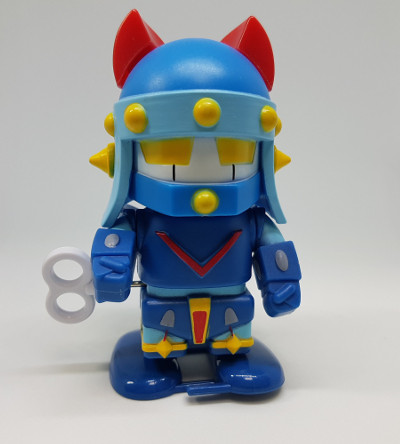

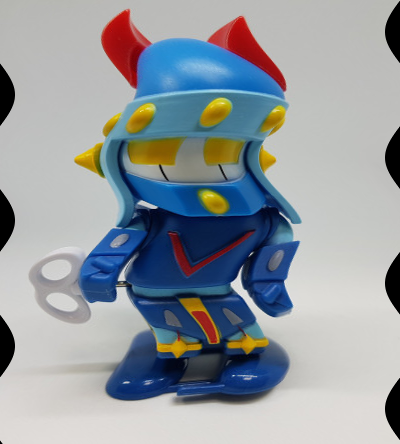

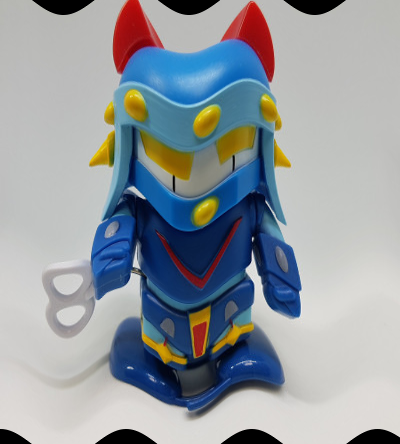

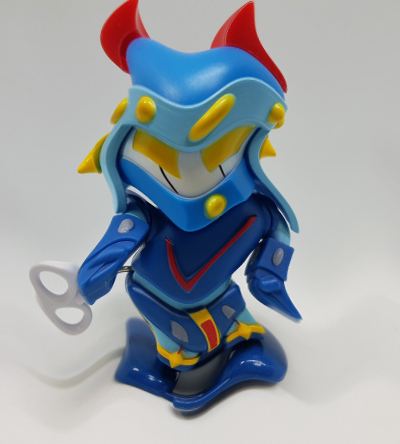

In [ ]:
import cv2
import numpy as np

l = 20      # 파장(wave length)
amp = 15    # 진폭(amplitude)

img = cv2.imread('../img/taekwonv1.jpg')
rows, cols = img.shape[:2]

# 초기 매핑 배열 생성 ---①
mapy, mapx = np.indices((rows, cols),dtype=np.float32)

# sin, cos 함수를 적용한 변형 매핑 연산 ---②
sinx = mapx + amp * np.sin(mapy/l)
cosy = mapy + amp * np.cos(mapx/l)

# 영상 매핑 ---③

img_sinx=cv2.remap(img, sinx, mapy, cv2.INTER_LINEAR) # x축만 sin 곡선 적용
img_cosy=cv2.remap(img, mapx, cosy, cv2.INTER_LINEAR) # y축만 cos 곡선 적용
# x,y 축 모두 sin, cos 곡선 적용 및 외곽 영역 보정
img_both=cv2.remap(img, sinx, cosy, cv2.INTER_LINEAR, \
                    None, cv2.BORDER_REPLICATE)
# 결과 출력
#cv2.imshow('origin', img)
#cv2.imshow('sin x', img_sinx)
#cv2.imshow('cos y', img_cosy)
#cv2.imshow('sin cos', img_both)

cv2_imshow(img)
cv2_imshow(img_sinx)
cv2_imshow(img_cosy)
cv2_imshow(img_both)

cv2.waitKey()
cv2.destroyAllWindows()

### 5.3.2 오목 렌즈와 볼록 렌즈 왜곡

In [ ]:
!python remap_lens.py

(444, 400, 3)


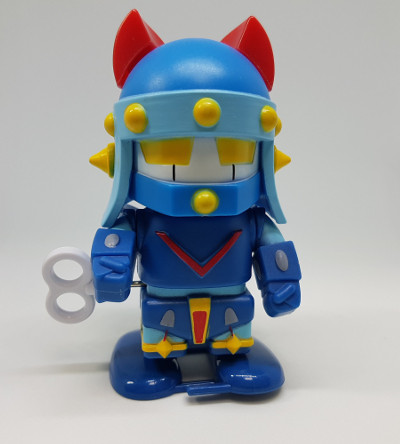

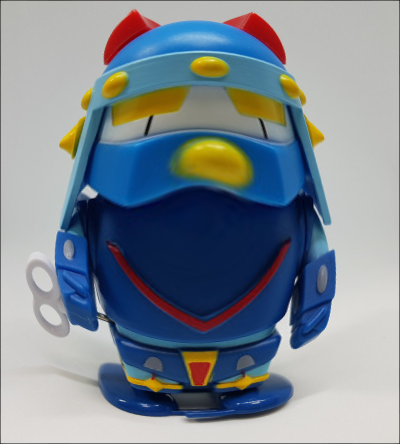

In [ ]:
import cv2
import numpy as np

img = cv2.imread('../img/taekwonv1.jpg')
print(img.shape)
rows, cols = img.shape[:2]

# ---① 설정 값 셋팅
exp = 2       # 볼록, 오목 지수 (오목 : 0.1 ~ 1, 볼록 : 1.1~)
scale = 1           # 변환 영역 크기 (0 ~ 1)

# 매핑 배열 생성 ---②
mapy, mapx = np.indices((rows, cols),dtype=np.float32)

# 좌상단 기준좌표에서 -1~1로 정규화된 중심점 기준 좌표로 변경 ---③
mapx = 2*mapx/(cols-1)-1
mapy = 2*mapy/(rows-1)-1

# 직교좌표를 극 좌표로 변환 ---④
r, theta = cv2.cartToPolar(mapx, mapy)

# 왜곡 영역만 중심확대/축소 지수 적용 ---⑤
r[r< scale] = r[r<scale] **exp

# 극 좌표를 직교좌표로 변환 ---⑥
mapx, mapy = cv2.polarToCart(r, theta)

# 중심점 기준에서 좌상단 기준으로 변경 ---⑦
mapx = ((mapx + 1)*cols-1)/2
mapy = ((mapy + 1)*rows-1)/2
# 재매핑 변환
distorted = cv2.remap(img,mapx,mapy,cv2.INTER_LINEAR)

#cv2.imshow('origin', img)
#cv2.imshow('distorted', distorted)

cv2_imshow(img)
cv2_imshow(distorted)

cv2.waitKey()
cv2.destroyAllWindows()

### 5.3.3 방사 왜곡

In [ ]:
!python remap_barrel.py

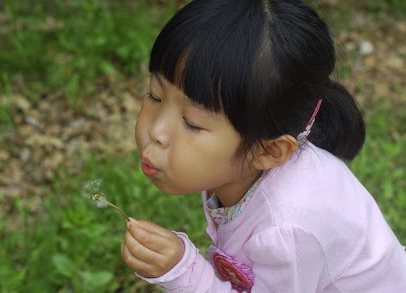

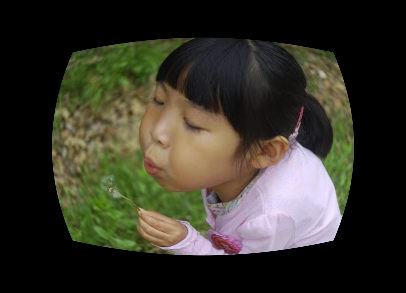

In [ ]:
import cv2
import numpy as np

# 왜곡 계수 설정 ---①
k1, k2, k3 = 0.5, 0.2, 0.0 # 배럴 왜곡
#k1, k2, k3 = -0.3, 0, 0    # 핀큐션 왜곡

img = cv2.imread('../img/girl.jpg')
rows, cols = img.shape[:2]

# 매핑 배열 생성 ---②
mapy, mapx = np.indices((rows, cols),dtype=np.float32)

# 중앙점 좌표로 -1~1 정규화 및 극좌표 변환 ---③
mapx = 2*mapx/(cols-1)-1
mapy = 2*mapy/(rows-1)-1
r, theta = cv2.cartToPolar(mapx, mapy)

# 방사 왜곡 변영 연산 ---④
ru = r*(1+k1*(r**2) + k2*(r**4) + k3*(r**6))

# 직교좌표 및 좌상단 기준으로 복원 ---⑤
mapx, mapy = cv2.polarToCart(ru, theta)
mapx = ((mapx + 1)*cols-1)/2
mapy = ((mapy + 1)*rows-1)/2
# 리매핑 ---⑥
distored = cv2.remap(img,mapx,mapy,cv2.INTER_LINEAR)

#cv2.imshow('original', img)
#cv2.imshow('distorted', distored)

cv2_imshow(img)
cv2_imshow(distored)

cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
!python undistort_barrel.py

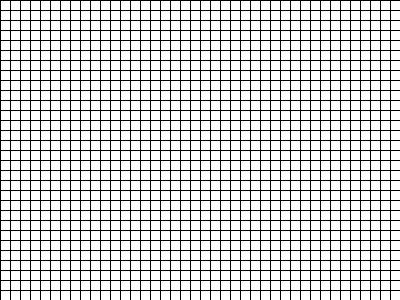

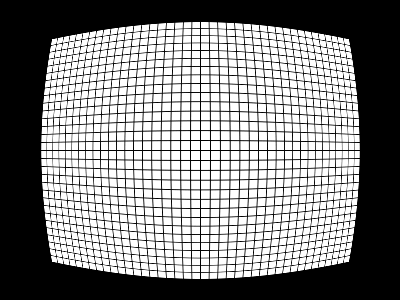

In [ ]:
import numpy as np
import cv2

# 격자 무늬 영상 생성 ---①
img = np.full((300,400,3), 255, np.uint8)
img[::10, :, :] = 0
img[:, ::10, :] = 0
width  = img.shape[1]
height = img.shape[0]

# 왜곡 계수 설정 ---②
k1, k2, p1, p2 = 0.001, 0, 0, 0     # 배럴 왜곡
#k1, k2, p1, p2 = -0.0005, 0, 0, 0  # 핀쿠션 왜곡
distCoeff = np.float64([k1, k2, p1, p2])

# 임의의 값으로 카메라 매트릭스 설정 ---③
fx, fy = 10, 10
cx, cy = width/2, height/2
camMtx = np.float32([[fx,0, cx],
                     [0, fy, cy],
                     [0 ,0 ,1]])

# 왜곡 변형 ---④
dst = cv2.undistort(img,camMtx,distCoeff)

#cv2.imshow('original', img)
#cv2.imshow('dst',dst)

cv2_imshow(img)
cv2_imshow(dst)

cv2.waitKey(0)
cv2.destroyAllWindows()

##5.4 실전 워크숍

### 5.4.1 모자이크 처리 1

In [ ]:
!python workshop_mosaic.py

In [ ]:
import cv2

rate = 15               # 모자이크에 사용할 축소 비율 (1/rate)
win_title = 'mosaic'    # 창 제목
img = cv2.imread('../img/taekwonv1.jpg')    # 이미지 읽기

while True:
    x,y,w,h = cv2.selectROI(win_title, img, False) # 관심영역 선택
    if w and h:
        roi = img[y:y+h, x:x+w]   # 관심영역 지정
        roi = cv2.resize(roi, (w//rate, h//rate)) # 1/rate 비율로 축소
        # 원래 크기로 확대
        roi = cv2.resize(roi, (w,h), interpolation=cv2.INTER_AREA)
        img[y:y+h, x:x+w] = roi   # 원본 이미지에 적용
        #cv2.imshow(win_title, img)
        cv2_imshow(img)
    else:
        break
cv2.destroyAllWindows()

### 5.4.2 포토샵 리퀴파이 도구

In [ ]:
!python workshop_liquify_tool.py

In [ ]:
import cv2
import numpy as np

win_title = 'Liquify'   # 창 이름
half = 50               # 관심 영역 절반 크기
isDragging = False      # 드래그 여부 플래그

# 리퀴파이 함수
def liquify(img, cx1,cy1, cx2,cy2) :
    # 대상 영역 좌표와 크기 설정
    x, y, w, h = cx1-half, cy1-half, half*2, half*2
    # 관심 영역 설정
    roi = img[y:y+h, x:x+w].copy()
    out = roi.copy()

    # 관심영역 기준으로 좌표 재 설정
    offset_cx1,offset_cy1 = cx1-x, cy1-y
    offset_cx2,offset_cy2 = cx2-x, cy2-y

    # 변환 이전 4개의 삼각형 좌표
    tri1 = [[ (0,0), (w, 0), (offset_cx1, offset_cy1)], # 상,top
            [ [0,0], [0, h], [offset_cx1, offset_cy1]], # 좌,left
            [ [w, 0], [offset_cx1, offset_cy1], [w, h]], # 우, right
            [ [0, h], [offset_cx1, offset_cy1], [w, h]]] # 하, bottom

    # 변환 이후 4개의 삼각형 좌표
    tri2 = [[ [0,0], [w,0], [offset_cx2, offset_cy2]], # 상, top
            [ [0,0], [0, h], [offset_cx2, offset_cy2]], # 좌, left
            [ [w,0], [offset_cx2, offset_cy2], [w, h]], # 우, right
            [ [0,h], [offset_cx2, offset_cy2], [w, h]]] # 하, bottom


    for i in range(4):
        # 각각의 삼각형 좌표에 대해 어핀 변환 적용
        matrix = cv2.getAffineTransform( np.float32(tri1[i]), \
                                         np.float32(tri2[i]))
        warped = cv2.warpAffine( roi.copy(), matrix, (w, h), \
            None, flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT_101)
        # 삼각형 모양의 마스크 생성
        mask = np.zeros((h, w), dtype = np.uint8)
        cv2.fillConvexPoly(mask, np.int32(tri2[i]), (255,255,255))

        # 마스킹 후 합성
        warped = cv2.bitwise_and(warped, warped, mask=mask)
        out = cv2.bitwise_and(out, out, mask=cv2.bitwise_not(mask))
        out = out + warped

    # 관심 영역을 원본 영상에 합성
    img[y:y+h, x:x+w] = out
    return img

# 마우스 이벤트 핸들 함수
def onMouse(event,x,y,flags,param):
    global cx1, cy1, isDragging, img      # 전역변수 참조
    # 마우스 중심 점을 기준으로 대상 영역 따라다니기
    if event == cv2.EVENT_MOUSEMOVE:
        if not isDragging :
            img_draw = img.copy()
            # 드래그 영역 표시
            cv2.rectangle(img_draw, (x-half, y-half), \
                    (x+half, y+half), (0,255,0))
            cv2.imshow(win_title, img_draw) # 사각형 표시된 그림 화면 출력
    elif event == cv2.EVENT_LBUTTONDOWN :
        isDragging = True                   # 드래그 시작
        cx1, cy1 = x, y                     # 드래그 시작된 원래의 위치 좌표 저장
    elif event == cv2.EVENT_LBUTTONUP :
        if isDragging:
            isDragging = False              # 드래그 끝
            # 드래그 시작 좌표와 끝난 좌표로 리퀴파이 적용 함수 호출
            liquify(img, cx1, cy1, x, y)
            cv2.imshow(win_title, img)

if __name__ == '__main__' :
    img = cv2.imread("../img/man_face.jpg")
    h, w = img.shape[:2]

    cv2.namedWindow(win_title)
    cv2.setMouseCallback(win_title, onMouse)
    #cv2.imshow(win_title, img)
    cv2_imshow(img)
    while True:
        key = cv2.waitKey(1)
        if key & 0xFF == 27:
            break
    cv2.destroyAllWindows()

AttributeError: 'NoneType' object has no attribute 'shape'

### 5.4.3 왜곡 거울 카메라

In [ ]:
!python workhop_distotion_camera.py

In [ ]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 320)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 240)
rows, cols = 240, 320
map_y, map_x = np.indices((rows, cols), dtype=np.float32)

# 거울 왜곡 효과
map_mirrorh_x,map_mirrorh_y = map_x.copy(), map_y.copy()
map_mirrorv_x,map_mirrorv_y = map_x.copy(), map_y.copy()
## 좌우 대칭 거울 좌표 연산
map_mirrorh_x[: , cols//2:] = cols - map_mirrorh_x[:, cols//2:]-1
## 상하 대칭 거울 좌표 연산
map_mirrorv_y[rows//2:, :] = rows - map_mirrorv_y[rows//2:, :]-1

# 물결 효과
map_wave_x, map_wave_y = map_x.copy(), map_y.copy()
map_wave_x = map_wave_x + 15*np.sin(map_y/20)
map_wave_y = map_wave_y + 15*np.sin(map_x/20)


# 렌즈 효과
## 렌즈 효과, 중심점 이동
map_lenz_x = 2*map_x/(cols-1)-1
map_lenz_y = 2*map_y/(rows-1)-1
## 렌즈 효과, 극좌표 변환
r, theta = cv2.cartToPolar(map_lenz_x, map_lenz_y)
r_convex = r.copy()
r_concave = r
## 볼록 렌즈 효과 매핑 좌표 연산
r_convex[r< 1] = r_convex[r<1] **2
print(r.shape, r_convex[r<1].shape)
## 오목 렌즈 효과 매핑 좌표 연산
r_concave[r< 1] = r_concave[r<1] **0.5
## 렌즈 효과, 직교 좌표 복원
map_convex_x, map_convex_y = cv2.polarToCart(r_convex, theta)
map_concave_x, map_concave_y = cv2.polarToCart(r_concave, theta)
## 렌즈 효과, 좌상단 좌표 복원
map_convex_x = ((map_convex_x + 1)*cols-1)/2
map_convex_y = ((map_convex_y + 1)*rows-1)/2
map_concave_x = ((map_concave_x + 1)*cols-1)/2
map_concave_y = ((map_concave_y + 1)*rows-1)/2

while True:
    ret, frame = cap.read()
    # 준비한 매핑 좌표로 영상 효과 적용
    mirrorh=cv2.remap(frame,map_mirrorh_x,map_mirrorh_y,cv2.INTER_LINEAR)
    mirrorv=cv2.remap(frame,map_mirrorv_x,map_mirrorv_y,cv2.INTER_LINEAR)
    wave = cv2.remap(frame,map_wave_x,map_wave_y,cv2.INTER_LINEAR, \
                    None, cv2.BORDER_REPLICATE)
    convex = cv2.remap(frame,map_convex_x,map_convex_y,cv2.INTER_LINEAR)
    concave = cv2.remap(frame,map_concave_x,map_concave_y,cv2.INTER_LINEAR)
    # 영상 합치기
    r1 = np.hstack(( frame, mirrorh, mirrorv))
    r2 = np.hstack(( wave, convex, concave))
    merged = np.vstack((r1, r2))

    #cv2.imshow('distorted',merged)
    cv2_imshow(merged)
    if cv2.waitKey(1) & 0xFF== 27:
        break
cap.release
cv2.destroyAllWindows()

(240, 320) (59868,)


error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/imgwarp.cpp:695: error: (-215:Assertion failed) !ssize.empty() in function 'remapBilinear'
